In [309]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import missingno as msno
import numpy as np

## Load All Pram Sold Data

In [310]:
df = pd.read_json('../../data/refined_data.json')

In [311]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 633 entries, 0 to 632
Data columns (total 26 columns):
 #   Column                                Non-Null Count  Dtype              
---  ------                                --------------  -----              
 0   property_id                           633 non-null    object             
 1   date                                  633 non-null    datetime64[ns, UTC]
 2   price                                 558 non-null    float64            
 3   sales_count                           633 non-null    int64              
 4   url                                   633 non-null    object             
 5   address                               633 non-null    object             
 6   street                                633 non-null    object             
 7   street_number                         633 non-null    int64              
 8   suburb                                628 non-null    object             
 9   solar                

## Replace url with the real url

In [312]:
df['url'] = df['url'].apply(lambda x: f"https://homes.co.nz/address{x}")

In [313]:
df['date_month'] = pd.to_datetime(df['date']).dt.to_period('M')

C:\Users\YLui\AppData\Local\Temp\ipykernel_2168\4002368205.py:1: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['date_month'] = pd.to_datetime(df['date']).dt.to_period('M')


## Show the data with duplicated address and only keep the highest price one

In [314]:
df.loc[df.duplicated(subset=['address'], keep=False), ['address','date_month', 'price', 'url', 'decade_built']]

,address,date_month,price,url,decade_built
291,"25 Hollis Rd, Paraparaumu Beach, Paraparaumu",2023-02,550000.0,https://homes.co.nz/address/paraparaumu/parapa...,1970.0
358,"25 Hollis Rd, Paraparaumu Beach, Paraparaumu",2022-12,510000.0,https://homes.co.nz/address/paraparaumu/parapa...,1970.0
378,"72 Rimu Road, Raumati Beach, Paraparaumu",2022-12,476000.0,https://homes.co.nz/address/paraparaumu/raumat...,1990.0
379,"72 Rimu Road, Raumati Beach, Paraparaumu",2022-12,500000.0,https://homes.co.nz/address/paraparaumu/raumat...,1990.0
417,"72 Rimu Road, Raumati Beach, Paraparaumu",2022-11,440000.0,https://homes.co.nz/address/paraparaumu/raumat...,1990.0
569,"57 Mazengarb Road, Paraparaumu Beach, Paraparaumu",2022-09,NaN,https://homes.co.nz/address/paraparaumu/parapa...,1970.0
599,"57 Mazengarb Road, Paraparaumu Beach, Paraparaumu",2022-08,681000.0,https://homes.co.nz/address/paraparaumu/parapa...,1970.0


In [315]:
df.sort_values(by=['price'], ascending=False, inplace=True)
df.drop_duplicates(subset=['address'], keep='first', inplace=True)

## Show Missing Data

In [316]:
#msno.bar(df)

In [317]:
df.isna().sum().sort_values(ascending=False)

price                                   74
solar                                   70
display_estimated_rental_lower_value    39
display_estimated_rental_upper_value    39
decade_built                            37
bed_estimate                            12
bath_estimate                           12
suburb                                   5
display_estimated_upper_value            0
agent                                    0
has_deck                                 0
land_area                                0
floor_area                               0
num_car_spaces                           0
estimated_rental_yield                   0
property_id                              0
display_estimated_lower_value            0
date                                     0
improvement_value                        0
land_value                               0
capital_value                            0
street_number                            0
street                                   0
address    

In [318]:
# Fill Missing Price Data with its mean value
#df['price'] = df['price'].replace(0, np.nan)
#df['price'] = df['price'].fillna(df['price'].mean())

## Display the data with missing price

In [319]:
df.loc[df['price'].isna(), ['address', 'capital_value', 'land_value', 'improvement_value', 'display_estimated_lower_value','display_estimated_lower_value', 'url']]

,address,capital_value,land_value,improvement_value,display_estimated_lower_value,display_estimated_lower_value,url
0,"41 Marram Way, Peka Peka",1030000,510000,520000,1090,1090,https://homes.co.nz/address/peka-peka/41-marra...
1,"53 Kohekohe Road, Waikanae",920000,510000,410000,1020,1020,https://homes.co.nz/address/waikanae/waikanae/...
2,"33 Ocean Road, Paraparaumu Beach, Paraparaumu",660000,430000,230000,705000,705000,https://homes.co.nz/address/paraparaumu/parapa...
3,"A/2 Tudor Court, Paraparaumu Beach, Paraparaumu",590000,330000,260000,625000,625000,https://homes.co.nz/address/paraparaumu/parapa...
4,"11 Aburoc Place, Paraparaumu Beach, Paraparaumu",790000,410000,380000,870000,870000,https://homes.co.nz/address/paraparaumu/parapa...
...,...,...,...,...,...,...,...
514,"189 Tutere Street, Waikanae Beach, Waikanae",890000,570000,320000,940000,940000,https://homes.co.nz/address/waikanae/waikanae-...
525,"3 Trinity Place, Paraparaumu Beach, Paraparaumu",670000,360000,310000,715000,715000,https://homes.co.nz/address/paraparaumu/parapa...
545,"17 Nathan Avenue, Paraparaumu Beach, Paraparaumu",670000,530000,140000,695000,695000,https://homes.co.nz/address/paraparaumu/parapa...
592,"25/17 Redwood Close, Paraparaumu",400000,235000,165000,425000,425000,https://homes.co.nz/address/paraparaumu/parapa...


## Drop price if is missing

In [320]:
df['price'] = df['price'].replace(0, np.nan)
df.dropna(subset = ['price'], inplace=True)

## calculate the average price group by suburb

<Axes: xlabel='suburb'>

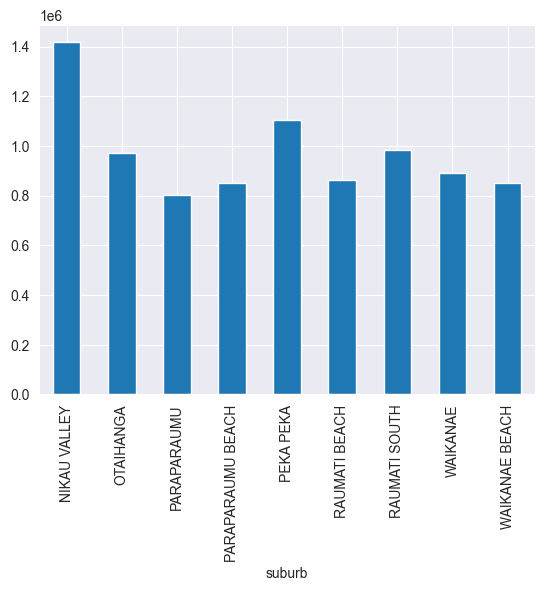

In [321]:
df.groupby(['suburb'])['price'].mean().plot(kind='bar')


## Sales by month

<Axes: xlabel='date_month'>

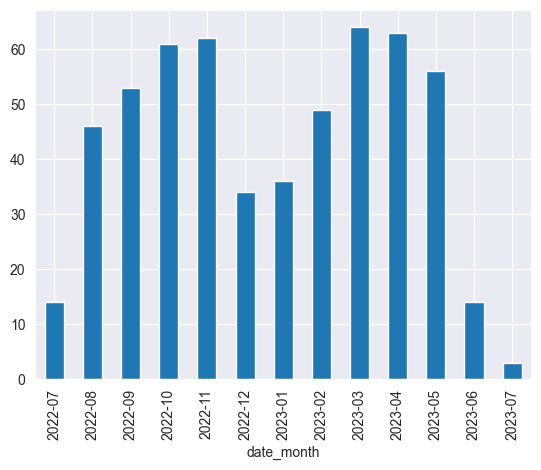

In [322]:
df.groupby(['date_month'])['date_month'].count().plot(kind='bar')